<a href="https://colab.research.google.com/github/danikayoung16/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H: Section 22.4, 22.5, 22.6

### Danika Young

# Numerical Error and Instability


### Types of Numerical Error

Numerical errors occur when exact mathematical operations are approximated using finite-precision arithmetic or numerical methods. These include:

- **Round-off error**: Caused by limitations of machine precision.
- **Truncation error**: Caused by approximating an infinite process (like Taylor series or integrals) using a finite number of steps.
- **Catastrophic cancellation**: Occurs when subtracting two nearly equal numbers, causing significant loss of precision.


In [6]:
import numpy as np
import math

def taylor_exp(x, n_terms):
    return sum([x**k / math.factorial(k) for k in range(n_terms)])

true_val = np.exp(1)
approx_val = taylor_exp(1, 5)

print("True e^1:", true_val)
print("Approximated e^1 with 5 terms:", approx_val)
print("Truncation error:", abs(true_val - approx_val))


True e^1: 2.718281828459045
Approximated e^1 with 5 terms: 2.708333333333333
Truncation error: 0.009948495125712054


In [7]:
x1 = 1.0000001
x2 = 1.0000000
difference = x1 - x2
print("Difference (should be 1e-7):", difference)


Difference (should be 1e-7): 1.0000000005838672e-07


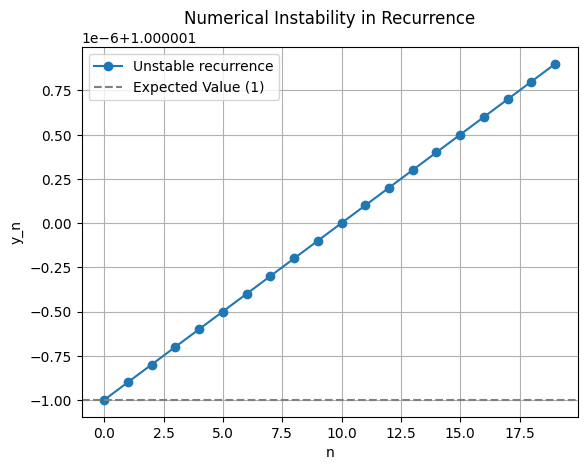

In [8]:
# Recurrence relation that should output y_n = 1 for all n
def unstable_recurrence(n):
    y = [1, 1.0000001]  # small perturbation in second value
    for i in range(2, n):
        y.append(2 * y[-1] - y[-2])
    return y

import matplotlib.pyplot as plt

unstable = unstable_recurrence(20)
plt.plot(range(20), unstable, 'o-', label="Unstable recurrence")
plt.axhline(1, color='gray', linestyle='--', label="Expected Value (1)")
plt.legend()
plt.title("Numerical Instability in Recurrence")
plt.xlabel("n")
plt.ylabel("y_n")
plt.grid(True)
plt.show()


# Predictor-Corrector Methods

Predictor-Corrector methods are used to solve Ordinary Differential Equations (ODEs) numerically.
General Idea:
Predict the next value using a simple method (Euler).
Correct that prediction using a more accurate method (like the trapezoidal rule).

Example ODE:

$(dy/dx) = f(x,y), $
$y(x_0) = y_0 $



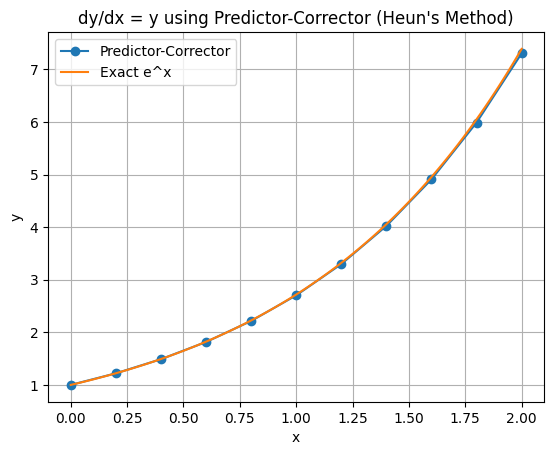

In [9]:
def f(x, y):
    return y  # dy/dx = y

def predictor_corrector(x0, y0, h, steps):
    x_vals = [x0]
    y_vals = [y0]

    for i in range(steps):
        x_n = x_vals[-1]
        y_n = y_vals[-1]

        # Predictor step: Euler method
        y_predict = y_n + h * f(x_n, y_n)
        x_next = x_n + h

        # Corrector step: Average slope
        y_correct = y_n + (h/2) * (f(x_n, y_n) + f(x_next, y_predict))

        x_vals.append(x_next)
        y_vals.append(y_correct)

    return x_vals, y_vals

# Parameters
x0, y0 = 0, 1
h = 0.2
steps = 10

x_vals, y_vals = predictor_corrector(x0, y0, h, steps)
x_exact = np.linspace(0, 2, 100)
y_exact = np.exp(x_exact)

plt.plot(x_vals, y_vals, 'o-', label="Predictor-Corrector")
plt.plot(x_exact, y_exact, label="Exact e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("dy/dx = y using Predictor-Corrector (Heun's Method)")
plt.grid(True)
plt.show()


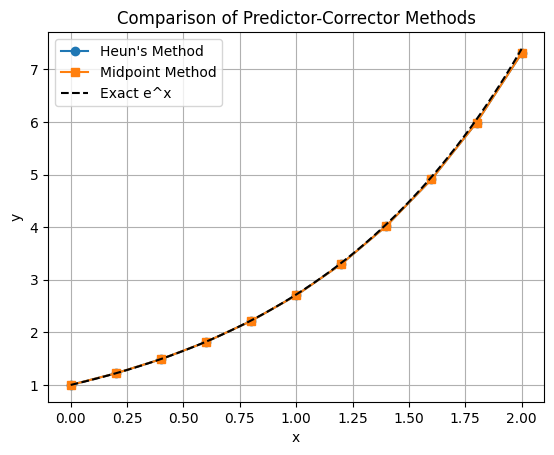

In [10]:
def midpoint_method(x0, y0, h, steps):
    x_vals = [x0]
    y_vals = [y0]

    for _ in range(steps):
        x_n = x_vals[-1]
        y_n = y_vals[-1]

        k1 = f(x_n, y_n)
        k2 = f(x_n + h/2, y_n + (h/2) * k1)
        y_next = y_n + h * k2
        x_next = x_n + h

        x_vals.append(x_next)
        y_vals.append(y_next)

    return x_vals, y_vals

x_vals2, y_vals2 = midpoint_method(x0, y0, h, steps)

# Plot both methods
plt.plot(x_vals, y_vals, 'o-', label="Heun's Method")
plt.plot(x_vals2, y_vals2, 's-', label="Midpoint Method")
plt.plot(x_exact, y_exact, 'k--', label="Exact e^x")
plt.legend()
plt.grid(True)
plt.title("Comparison of Predictor-Corrector Methods")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
